In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [9]:
# data folder is a Path lib, available in python 3.5
# to concatenate it with other paths, use slash operator "/"
data_folder = Path('withZigzag')

In [12]:
symbols_file = data_folder / '_AllSymbols.csv'
symbols_df = pd.read_csv(symbols_file, header=0)
symbols_df

,listSymbol
0,2S
1,A
2,AA
3,AAV
4,ABC
5,ABICO
6,ABPIF
7,ACAP
8,ACC
9,ACD


In [49]:
## convert the dataframe into a list of strings
symbols_str = symbols_df.values.ravel().tolist()
print('Total symbols:', len(symbols_str))

stock_dict = {} # maps stock name to dataframe
stock_rows = [] # only for statistics plotting purpose
## read all stock files as a dict of (name: dataframe) pairs
for i, symbol in enumerate(symbols_str):
    filepath = (data_folder / symbol).with_suffix('.csv')
    if filepath.exists():
        stock_df = pd.read_csv(filepath, sep=',', header=0)
        stock_dict[symbol] = stock_df
        print('File #{}, Shape of "{}": {}'.format(i, symbol, stock_df.shape))
        stock_rows.append(stock_df.shape[0])
    else:
        print('Ignoring "{}" because it does not exist.'.format(filepath.as_posix()))
stock_rows = np.array(stock_rows)
print('Total data rows: {:,}'.format(np.sum(stock_rows)))

Total symbols: 963
File #0, Shape of "2S": (1741, 13)
File #1, Shape of "A": (3282, 13)
File #2, Shape of "AA": (479, 13)
File #3, Shape of "AAV": (1295, 13)
File #4, Shape of "ABC": (1240, 13)
File #5, Shape of "ABICO": (1086, 13)
File #6, Shape of "ABPIF": (963, 13)
File #7, Shape of "ACAP": (2097, 13)
File #8, Shape of "ACC": (2652, 13)
File #9, Shape of "ACD": (2464, 13)
File #10, Shape of "ACMG": (0, 13)
File #11, Shape of "ADAM": (2630, 13)
File #12, Shape of "ADVANC": (5309, 13)
File #13, Shape of "AEC": (3265, 13)
File #14, Shape of "AEONTS": (3482, 13)
File #15, Shape of "AF": (1944, 13)
File #16, Shape of "AF-O": (300, 13)
File #17, Shape of "AFC": (3395, 13)
File #18, Shape of "AFL": (0, 13)
File #19, Shape of "AGE": (2086, 13)
File #20, Shape of "AH": (3642, 13)
File #21, Shape of "AHC": (3279, 13)
File #22, Shape of "AI": (2272, 13)
File #23, Shape of "AIE": (312, 13)
File #24, Shape of "AIFT": (0, 13)
File #25, Shape of "AIRA": (780, 13)
File #26, Shape of "AIT": (3455, 1

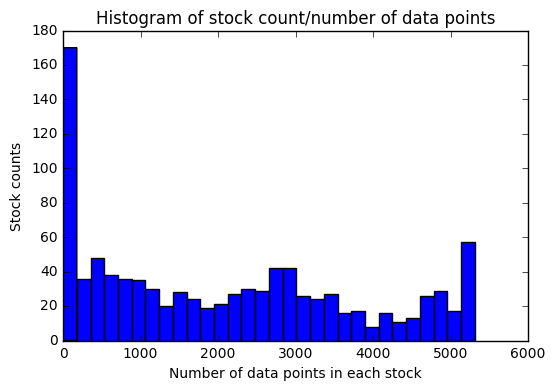

In [45]:
# show how many data points are available for each stock symbol
plt.hist(stock_rows, bins=30)
plt.xlabel('Number of data points in each stock')
plt.ylabel('Stock counts')
plt.title('Histogram of stock count/number of data points')
plt.show()

# Preparing data
1. For each stock, split the data into training set and test set (Train 2007 - 2010, test 2011 - 2016)
2. Extract features for each stock data including stock name one hot vectors, windowed bars, and outcome (up/down/neutral)
3. Concatenate features from all stocks